In [926]:
import pandas as pd
import numpy as np
import seaborn as sns
#plt.style.use('seaborn')
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [927]:
BostMar_df = pd.read_csv('https://github.com/llimllib/bostonmarathon/raw/master/results/2013/results.csv',encoding = "ISO-8859-1",error_bad_lines=False)
pd.set_option('display.max_columns', 50)

In [928]:
BostMar_df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,CAN,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,KEN,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,ETH,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,AUS,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,JPN,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [929]:
BostMar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.6+ MB


In [930]:
#check for duplicates
BostMar_df.duplicated().sum()

7

In [931]:
#drop duplicates
BostMar_df.drop_duplicates(keep='first',inplace=True)
BostMar_df.index = range(len(BostMar_df))

In [932]:
# check for null values
BostMar_df.isna().sum()

25k              0
age              0
name             0
division         0
10k              0
gender           0
half             0
official         0
bib              0
ctz          15400
country          0
overall          0
pace             0
state         1456
30k              0
5k               0
genderdiv        0
20k              0
35k              0
city             1
40k              0
dtype: int64

In [933]:
#drop columns with too many null values
BostMar_df.drop(['ctz','state'],1,inplace=True) 

In [934]:
len(BostMar_df)

16157

In [935]:
# check for null values
BostMar_df.isna().sum()

25k          0
age          0
name         0
division     0
10k          0
gender       0
half         0
official     0
bib          0
country      0
overall      0
pace         0
30k          0
5k           0
genderdiv    0
20k          0
35k          0
city         1
40k          0
dtype: int64

In [936]:
for obj in ['25k','10k','half','30k','official', '5k', '20k', '35k','40k']:
    BostMar_df[obj] = pd.to_numeric(BostMar_df[obj].replace("-",np.nan))
    BostMar_df.dropna(axis=0,inplace=True)
    BostMar_df.index = range(len(BostMar_df))

In [937]:
for num in ['genderdiv','division', 'overall']:
    BostMar_df[num] = BostMar_df[num].astype('category')

In [938]:
BostMar_df.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16046 entries, 0 to 16045
Data columns (total 19 columns):
25k          16046 non-null bool
age          16046 non-null bool
name         16046 non-null bool
division     16046 non-null bool
10k          16046 non-null bool
gender       16046 non-null bool
half         16046 non-null bool
official     16046 non-null bool
bib          16046 non-null bool
country      16046 non-null bool
overall      16046 non-null bool
pace         16046 non-null bool
30k          16046 non-null bool
5k           16046 non-null bool
genderdiv    16046 non-null bool
20k          16046 non-null bool
35k          16046 non-null bool
city         16046 non-null bool
40k          16046 non-null bool
dtypes: bool(19)
memory usage: 297.8 KB


In [939]:
BostMar_df.head()

,25k,age,name,division,10k,gender,half,official,bib,country,overall,pace,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,CAN,9,3.47,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,KEN,5,5.07,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,ETH,1,4.98,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,AUS,5,3.38,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,JPN,3,3.33,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [940]:
BostMar_df.describe(include='all')

,25k,age,name,division,10k,gender,half,official,bib,country,overall,pace,30k,5k,genderdiv,20k,35k,city,40k
count,16046.000000,16046.000000,16046,16046.0,16046.000000,16046,16046.000000,16046.000000,16046,16046,16046.0,16046.000000,16046.000000,16046.000000,16046.0,16046.000000,16046.000000,16046,16046.000000
unique,NaN,NaN,16026,3693.0,NaN,2,NaN,NaN,16046,68,15996.0,NaN,NaN,NaN,9784.0,NaN,NaN,4392,NaN
top,NaN,NaN,"Hannon, Michael",1.0,NaN,M,NaN,NaN,8175,USA,1.0,NaN,NaN,NaN,1.0,NaN,NaN,New York,NaN
freq,NaN,NaN,2,19.0,NaN,9600,NaN,NaN,1,13083,2.0,NaN,NaN,NaN,3.0,NaN,NaN,316,NaN
mean,118.232705,41.642341,NaN,NaN,46.744717,NaN,99.257116,208.191596,NaN,NaN,NaN,7.948614,143.608107,23.427125,NaN,94.077864,170.017024,NaN,196.595977
std,12.653386,10.356585,NaN,NaN,4.905780,NaN,10.503210,23.707693,NaN,NaN,NaN,0.904384,15.652438,2.462947,NaN,9.945942,18.950826,NaN,22.313625
min,48.320000,18.000000,NaN,NaN,18.030000,NaN,40.270000,85.530000,NaN,NaN,NaN,3.270000,59.450000,8.870000,NaN,38.230000,71.180000,NaN,80.550000
25%,108.970000,34.000000,NaN,NaN,43.220000,NaN,91.620000,191.735000,NaN,NaN,NaN,7.320000,132.220000,21.730000,NaN,86.800000,156.435000,NaN,180.980000
50%,119.220000,42.000000,NaN,NaN,47.200000,NaN,100.130000,209.280000,NaN,NaN,NaN,7.980000,144.775000,23.630000,NaN,94.900000,171.280000,NaN,197.870000
75%,127.350000,49.000000,NaN,NaN,50.300000,NaN,106.870000,225.230000,NaN,NaN,NaN,8.600000,154.815000,25.200000,NaN,101.300000,183.620000,NaN,212.650000


Here we'll take a look at distributions of the continuous variables

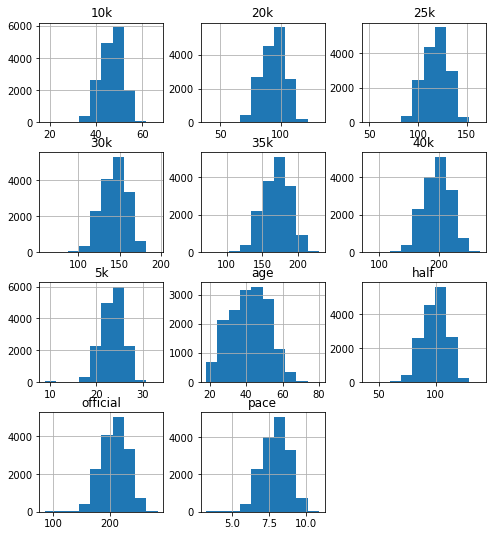

In [941]:
BostMar_df.hist(figsize=(8,9))
plt.show()

In [942]:
BostMar_df.describe(include='all')

,25k,age,name,division,10k,gender,half,official,bib,country,overall,pace,30k,5k,genderdiv,20k,35k,city,40k
count,16046.000000,16046.000000,16046,16046.0,16046.000000,16046,16046.000000,16046.000000,16046,16046,16046.0,16046.000000,16046.000000,16046.000000,16046.0,16046.000000,16046.000000,16046,16046.000000
unique,NaN,NaN,16026,3693.0,NaN,2,NaN,NaN,16046,68,15996.0,NaN,NaN,NaN,9784.0,NaN,NaN,4392,NaN
top,NaN,NaN,"Hannon, Michael",1.0,NaN,M,NaN,NaN,8175,USA,1.0,NaN,NaN,NaN,1.0,NaN,NaN,New York,NaN
freq,NaN,NaN,2,19.0,NaN,9600,NaN,NaN,1,13083,2.0,NaN,NaN,NaN,3.0,NaN,NaN,316,NaN
mean,118.232705,41.642341,NaN,NaN,46.744717,NaN,99.257116,208.191596,NaN,NaN,NaN,7.948614,143.608107,23.427125,NaN,94.077864,170.017024,NaN,196.595977
std,12.653386,10.356585,NaN,NaN,4.905780,NaN,10.503210,23.707693,NaN,NaN,NaN,0.904384,15.652438,2.462947,NaN,9.945942,18.950826,NaN,22.313625
min,48.320000,18.000000,NaN,NaN,18.030000,NaN,40.270000,85.530000,NaN,NaN,NaN,3.270000,59.450000,8.870000,NaN,38.230000,71.180000,NaN,80.550000
25%,108.970000,34.000000,NaN,NaN,43.220000,NaN,91.620000,191.735000,NaN,NaN,NaN,7.320000,132.220000,21.730000,NaN,86.800000,156.435000,NaN,180.980000
50%,119.220000,42.000000,NaN,NaN,47.200000,NaN,100.130000,209.280000,NaN,NaN,NaN,7.980000,144.775000,23.630000,NaN,94.900000,171.280000,NaN,197.870000
75%,127.350000,49.000000,NaN,NaN,50.300000,NaN,106.870000,225.230000,NaN,NaN,NaN,8.600000,154.815000,25.200000,NaN,101.300000,183.620000,NaN,212.650000


In [943]:
# create a binary feature for gender
BostMar_df['sex'] = np.where(BostMar_df.gender=='M',1,0)
BostMar_df.sex.value_counts()

1    9600
0    6446
Name: sex, dtype: int64

Now, let's compare the features in a pairplot

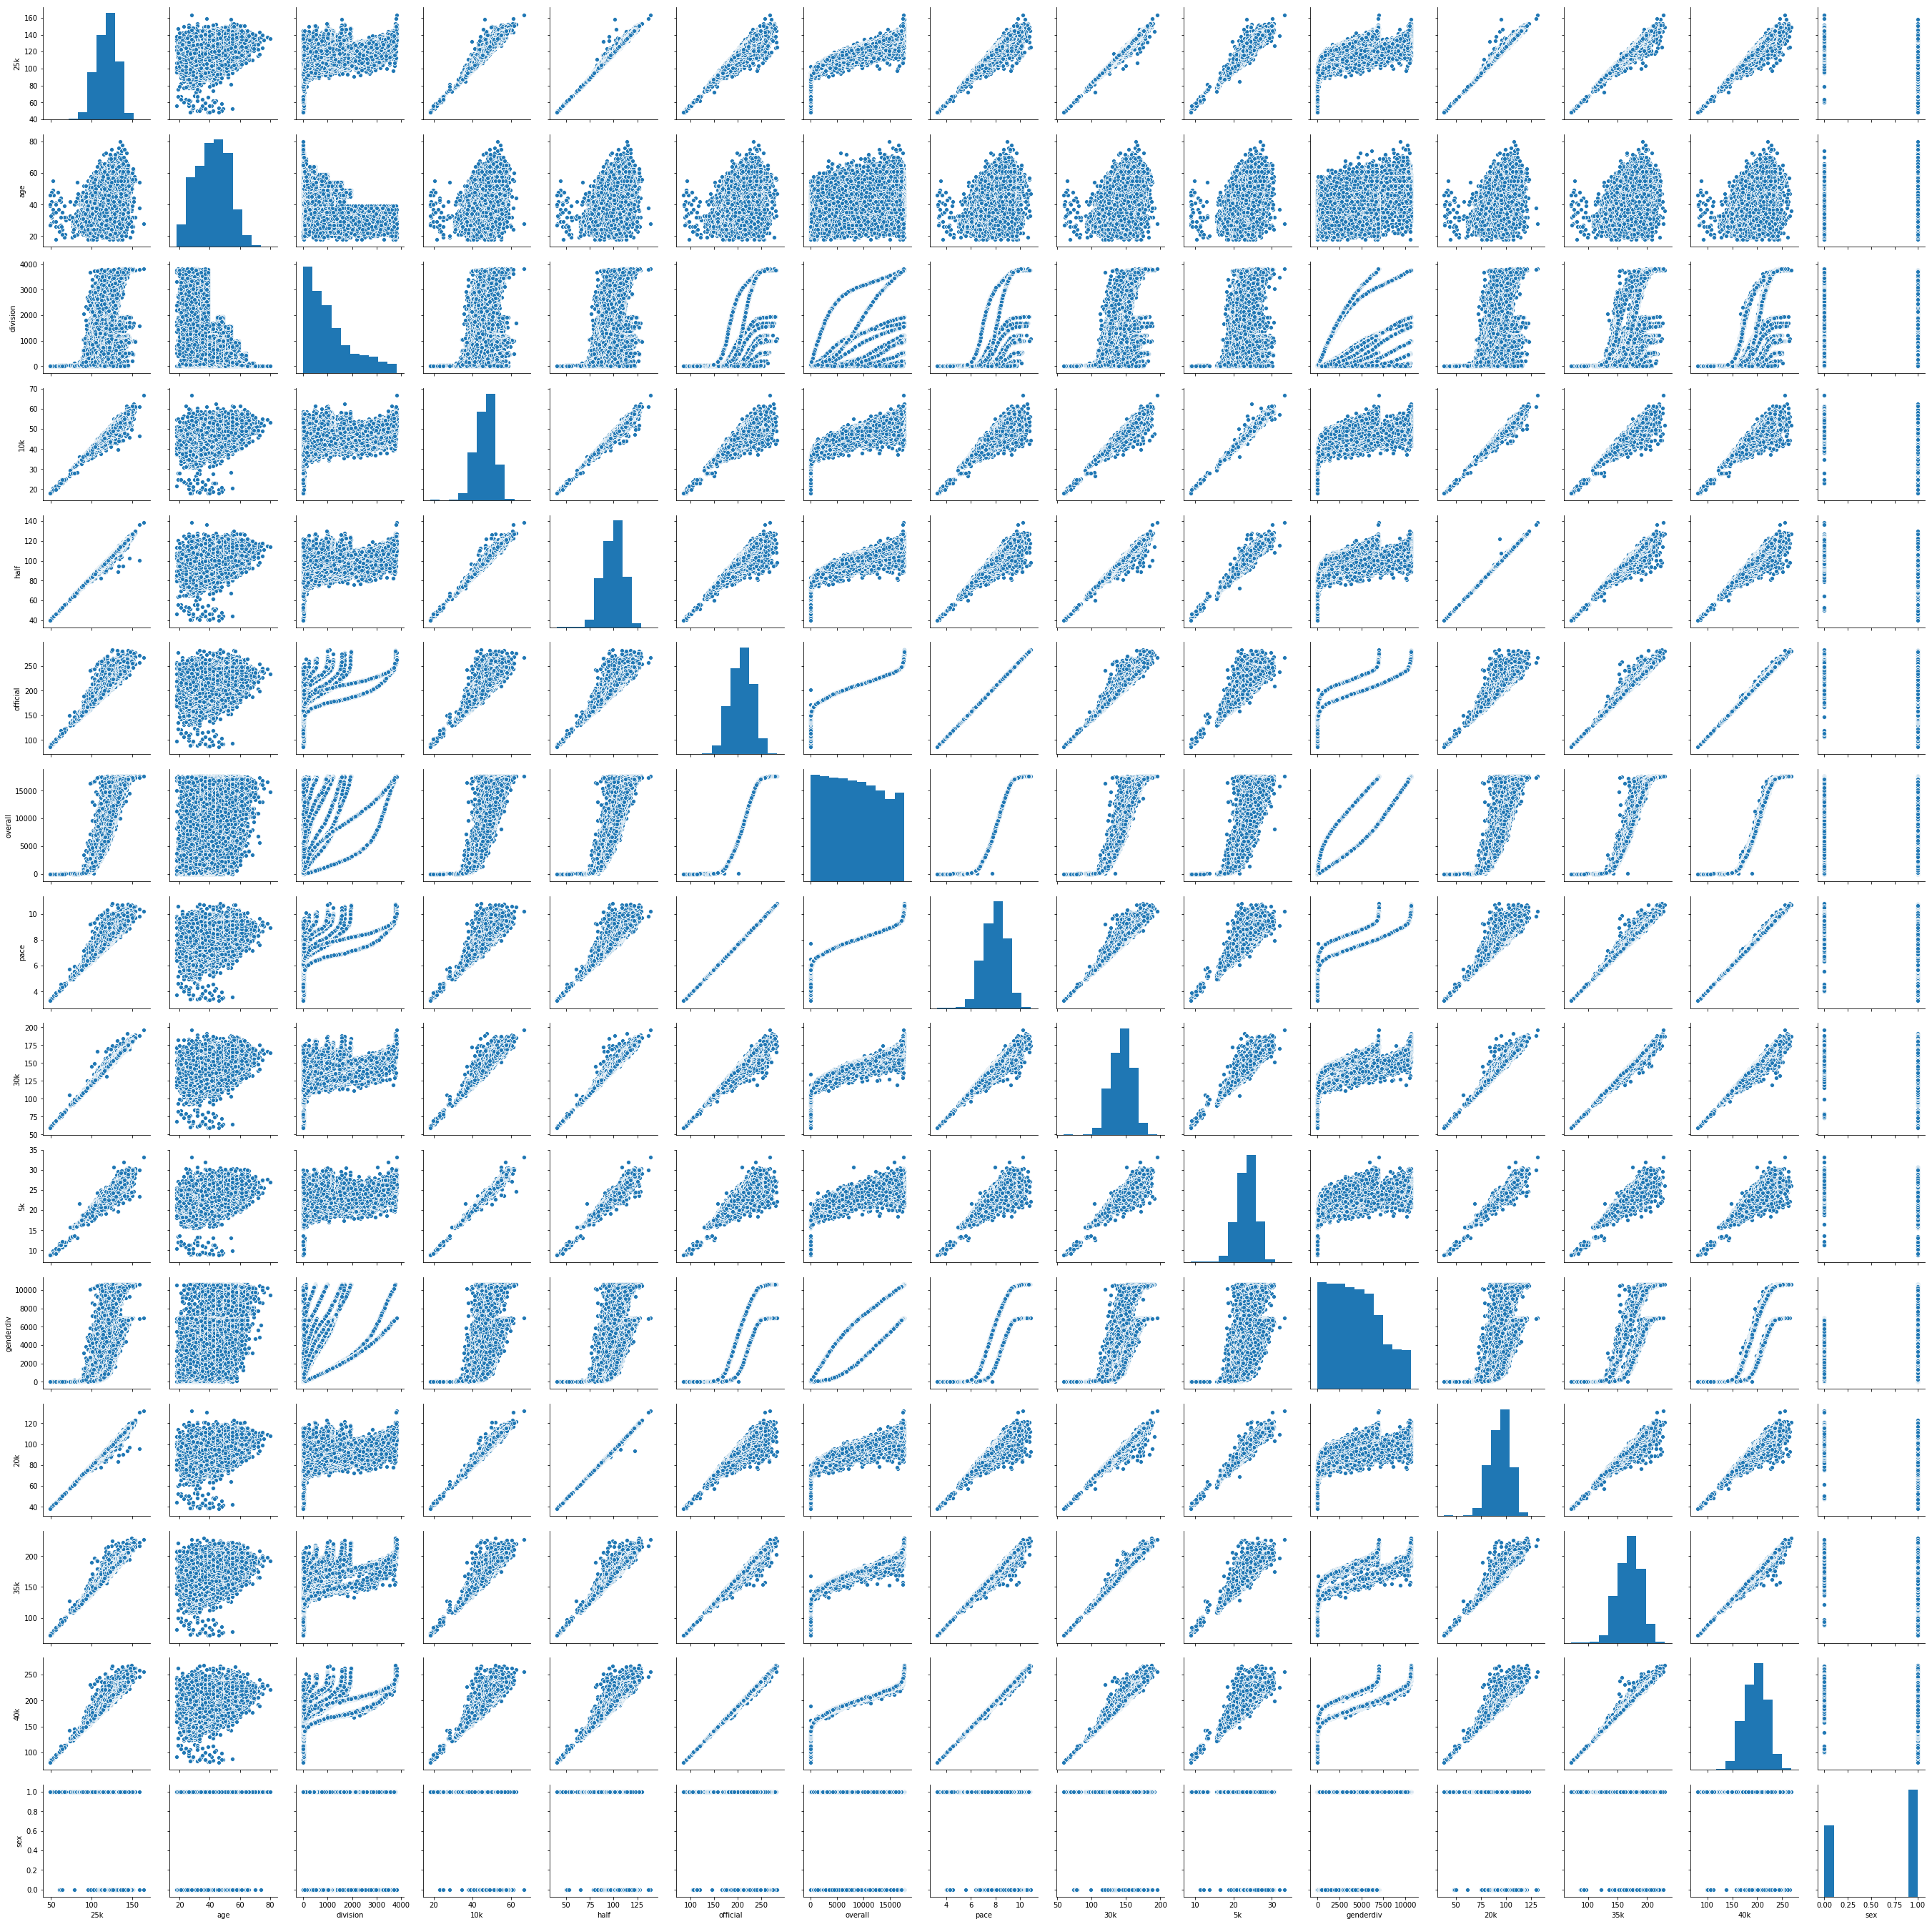

In [944]:
sns.pairplot(BostMar_df)
plt.show()

   From the pairplot it look like there are some obvious separation in some of the pairs especially in the age row.

In [945]:
men_df = BostMar_df[BostMar_df.gender=='M']
women_df = BostMar_df[BostMar_df.gender=='F']

In [946]:
BostMar_df.groupby('gender').official.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,6446.0,219.639155,17.324068,105.40,208.62,219.72,232.070,284.23
M,9600.0,200.505038,24.308218,85.53,183.08,199.16,216.935,282.20


In [947]:
BostMar_df.groupby('gender').age.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,6446.0,38.497828,9.204760,18.0,31.0,38.0,45.0,74.0
M,9600.0,43.753750,10.549858,18.0,36.0,45.0,51.0,80.0


I don't think it is very surprising to see that the men times are on average faster that the women times but it is interesting that the average time aren't very far apart. Also, the longest time ran was a man. The women also younger in age than the men.

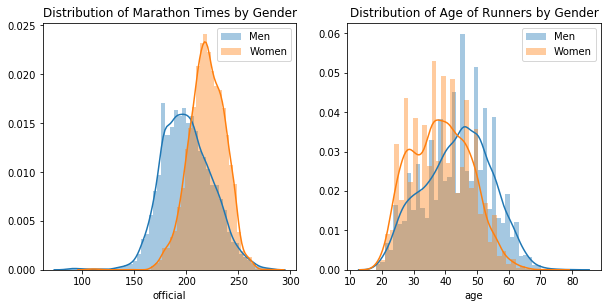

In [948]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(BostMar_df[BostMar_df.gender=='M'].official,label="Men")
sns.distplot(BostMar_df[BostMar_df.gender=='F'].official,label="Women")
plt.title('Distribution of Marathon Times by Gender')
plt.legend()
 
plt.subplot(222)
sns.distplot(BostMar_df[BostMar_df.gender=='M'].age,label="Men")
sns.distplot(BostMar_df[BostMar_df.gender=='F'].age,label="Women")
plt.title('Distribution of Age of Runners by Gender')
plt.legend()
plt.show()


The distributions of the net times for men and women both resemble a normal distribution. The men's distibution is just shifted to the left a slight bit more that the womens which is what we saw in the statistics. In contrast the age of the of the women is shifted slightly to the left.
We also need to be aware that there are times from wheelchair compeditors that have much faster times that some of the runners. Normally I would drop these columns because it could skew the analysis but I want to see how the clustering algoritims handle the data with those times inculded.

In [949]:
# top 30 fastest countries
BostMar_df.groupby('country').official.mean().sort_values()[:30] 

country
KEN    133.195000
ETH    133.810000
RSA    167.795000
HUN    176.755000
POR    178.680000
BER    181.068000
EST    182.085000
SUI    188.716486
ECU    188.804000
LTU    189.835000
UAE    190.070000
PER    192.500000
ESP    193.381400
POL    194.187143
AUS    194.646579
PAN    196.025000
VEN    196.414762
IRL    197.075357
FIN    197.476667
NOR    197.577619
UKR    198.895000
SVK    198.946250
DOM    199.655000
SWE    199.950625
PHI    200.230000
ISL    200.863333
GRE    200.994000
NED    201.258333
GUA    202.120833
RUS    202.210000
Name: official, dtype: float64

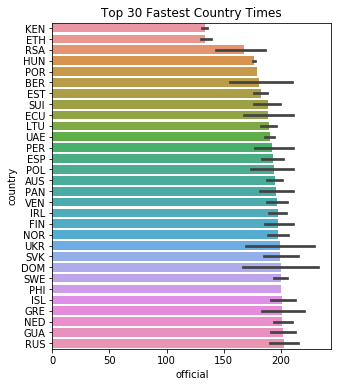

In [950]:
order = BostMar_df.groupby('country').official.mean().sort_values(ascending=True).index[:30]
plt.figure(figsize=(5,6))
sns.barplot(BostMar_df.official,BostMar_df.country, order=order)
plt.title('Top 30 Fastest Country Times')
plt.show()

In [951]:
# bin ages by how ages are grouped in the marathon
bins = [13,19,24,29,34,39,44,49,54,59,64,70,74,79,200]
BostMar_df['age_grp'] = pd.cut(BostMar_df.age,bins)
BostMar_df.age_grp.value_counts()

(44, 49]     2800
(39, 44]     2633
(34, 39]     2455
(49, 54]     2017
(29, 34]     1866
(24, 29]     1727
(54, 59]     1170
(19, 24]      642
(59, 64]      542
(64, 70]      139
(13, 19]       39
(70, 74]       10
(74, 79]        5
(79, 200]       1
Name: age_grp, dtype: int64

In [952]:
# indicator variable of wheelchair participants
BostMar_df['WC'] = np.where((BostMar_df.bib.str.contains('W'))|(BostMar_df.bib.str.contains("F")),1,0)
BostMar_df['WC'] = BostMar_df.WC.astype('category')

In [953]:
BostMar_df.head()

,25k,age,name,division,10k,gender,half,official,bib,country,overall,pace,30k,5k,genderdiv,20k,35k,city,40k,sex,age_grp,WC
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,CAN,9,3.47,62.07,8.90,9,38.80,74.73,Toronto,85.55,1,"(24, 29]",1
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,KEN,5,5.07,92.97,15.90,5,61.52,108.78,Kenya,124.77,1,"(29, 34]",0
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,ETH,1,4.98,92.72,15.93,1,61.53,108.68,Ambo,123.78,1,"(19, 24]",0
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,AUS,5,3.38,61.35,8.98,5,39.88,73.00,Hamilton,83.43,1,"(29, 34]",1
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,JPN,3,3.33,59.92,8.92,3,38.55,71.68,Iizuka,81.88,1,"(34, 39]",1


In [954]:
BostMar_df.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'country', 'overall', 'pace', '30k', '5k', 'genderdiv', '20k',
       '35k', 'city', '40k', 'sex', 'age_grp', 'WC'],
      dtype='object')

In [955]:
len(BostMar_df)

16046

## Make Clusters

The data set isn't exactly large but for my local machine I want it to run quickly so we will only look at the KMeans and Mean shift algoritms.

In [956]:
# Break into a set of features and a variable for the known outcome.


rows = BostMar_df.shape[0] - BostMar_df.shape[0] % 4
BostMar_df = BostMar_df.iloc[:rows, :]
 
X =BostMar_df[['25k', 'age',  '10k', 'half', 'official','overall', 
               'pace', '30k', '5k',  '20k','35k','40k']]

y = BostMar_df[['name', 'division','bib', 'country','sex','city', 'age_grp', 'WC','gender','genderdiv']]

# normalize data
X_norm = normalize(X)

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2,yh1,yh2 = train_test_split(
    X_norm,
    X_pca,
    y,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2,y1,y2 = train_test_split(
    X_half1,
    X_pcahalf1,
    yh1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4,y3,y4 = train_test_split(
    X_half2,
    X_pcahalf2,
    yh2,
    test_size=0.5,
    random_state=42)

## KMeans

In [957]:
# empty dataframe to hold sample prediction and sample pca
preds = pd.DataFrame()
#run kmeans 
for k in range(2,7,1):
    for data, pred,pca in zip([X1,X2,X3,X4],range(1,5,1),(X_pca1,X_pca2,X_pca3,X_pca4)):
        preds['predX{}_{}clust'.format(pred,k)] = KMeans(n_clusters=k).fit_predict(data)
        preds['pcaC1_X{}_{}clust'.format(pred,k)] = pca[:,0]
        preds['pcaC2_X{}_{}clust'.format(pred,k)] = pca[:,1]
         

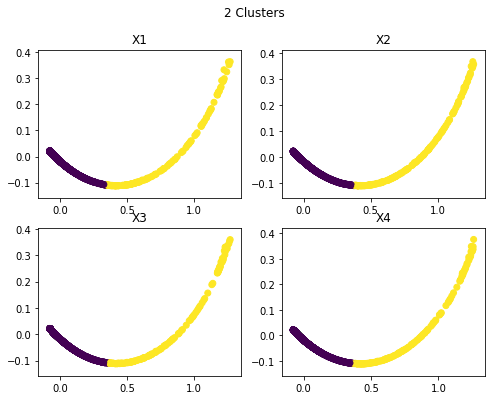

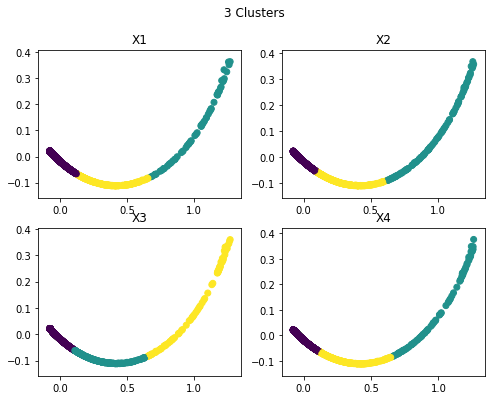

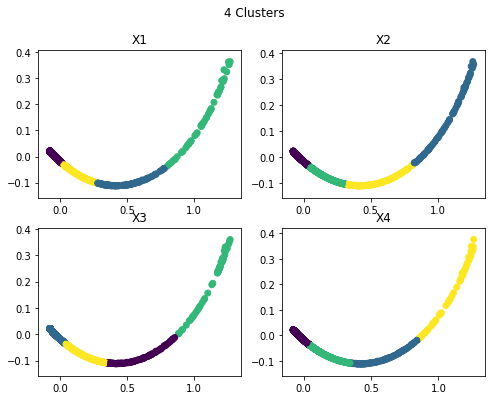

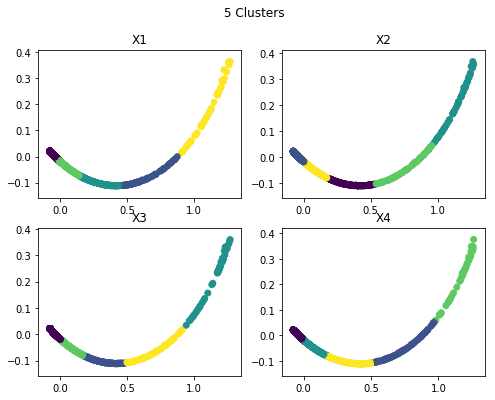

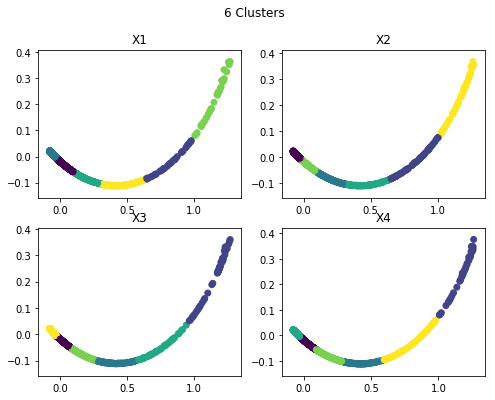

In [958]:

for k in range(2,7,1):
    plt.figure(figsize=(8,6))
    plt.suptitle('{} Clusters'.format(k))
    plt.tight_layout()
     
    for i in range(1,5,1):
        plt.subplot(2,2,i)
        plt.title('X{}'.format(i))
        x = preds['pcaC1_X{}_{}clust'.format(i,k)]
        y = preds['pcaC2_X{}_{}clust'.format(i,k)]
        clust = preds['predX{}_{}clust'.format(i,k)]
        plt.scatter(x,y,c=clust)
     

It appears that the group with 4 clusters is the most consistent throughout the samples.
We'll check the summary statistics of each sample and see if they are consistent as well.

In [959]:
X1 = pd.DataFrame(X1)
X2 = pd.DataFrame(X2)
X3 = pd.DataFrame(X3)
X4 = pd.DataFrame(X4)

for df in [X1,X2,X3,X4]:
    df['pca1'] = preds['pcaC1_X{}_{}clust'.format(i,k)]
    df['pca1'] = preds['pcaC2_X{}_{}clust'.format(i,k)]
    df['clusters'] = preds['predX{}_{}clust'.format(i,k)]


In [960]:
X1.groupby('clusters').describe()

0                                                              \
           count      mean       std       min       25%       50%       75%   
clusters                                                                       
0          649.0  0.030136  0.044601  0.006671  0.010152  0.015244  0.027082   
1           43.0  0.016632  0.018875  0.007773  0.009649  0.010739  0.017704   
2           93.0  0.028738  0.041541  0.007113  0.010895  0.015588  0.029895   
3         2953.0  0.028781  0.042017  0.006576  0.010047  0.014338  0.025891   
4          209.0  0.029601  0.046435  0.006420  0.009678  0.014001  0.027185   
5           64.0  0.020915  0.025361  0.006577  0.009722  0.012909  0.019688   

                         1                                                    \
               max   count      mean       std       min       25%       50%   
clusters                                                                       
0         0.290895   649.0  0.010534  0.016167  0.001037  0.003569  0.005301   
1         0.128792    43.0  0.005482  0.006354  0.002252  0.003325  0.004183   
2         0.278613    93.0  0.009692  0.012869  0.001886  0.003698  0.005259   
3         0.295179  2953.0  0.010397  0.017328  0.001065  0.003447  0.005026   
4         0.285304   209.0  0.010912  0.020449  0.001758  0.003292  0.005173   
5         0.184992    64.0  0.006858  0.007281  0.001482  0.003348  0.004626   

                                   2                                          \
               75%       max   count      mean       std       min       25%   
clusters                                                                       
0         0.009521  0.165253   649.0  0.011981  0.017748  0.002310  0.004014   
1         0.005298  0.044223    43.0  0.006606  0.007550  0.002912  0.003779   
2         0.010796  0.087588    93.0  0.011321  0.015993  0.002523  0.004287   
3         0.009513  0.287371  2953.0  0.011426  0.016664  0.002361  0.003953   
4         0.009665  0.158740   209.0  0.011757  0.018443  0.002574  0.003812   
5         0.006509  0.047317    64.0  0.008296  0.010210  0.002361  0.003830   

                                             3    ...            9      10  \
               50%       75%       max   count    ...          max   count   
clusters                                          ...                        
0         0.006030  0.010846  0.115628   649.0    ...     0.233168   649.0   
1         0.004365  0.007075  0.051532    43.0    ...     0.103052    43.0   
2         0.006203  0.011975  0.102478    93.0    ...     0.220012    93.0   
3         0.005686  0.010353  0.118164  2953.0    ...     0.235451  2953.0   
4         0.005570  0.010865  0.112930   209.0    ...     0.227548   209.0   
5         0.005017  0.007874  0.074722    64.0    ...     0.148202    64.0   

                                                                      \
              mean       std       min       25%       50%       75%   
clusters                                                               
0         0.042997  0.063285  0.010856  0.014641  0.021737  0.038629   
1         0.023803  0.026564  0.011852  0.014040  0.015527  0.025152   
2         0.041296  0.060371  0.011494  0.015496  0.022671  0.042604   
3         0.041131  0.059901  0.010488  0.014486  0.020601  0.036960   
4         0.042180  0.065729  0.010689  0.013919  0.020043  0.038554   
5         0.029971  0.035795  0.010497  0.013961  0.018728  0.028531   

                        11                                                    \
               max   count      mean       std       min       25%       50%   
clusters                                                                       
0         0.412072   649.0  0.049558  0.072630  0.013545  0.016964  0.025088   
1         0.181182    43.0  0.027498  0.030443  0.014010  0.016331  0.017968   
2         0.417210    93.0  0.047582  0.069082  0.013549  0.017709  0.026132   
3         0.432117  

In [961]:
X2.groupby('clusters').describe()

0                                                              \
           count      mean       std       min       25%       50%       75%   
clusters                                                                       
0          649.0  0.032448  0.047187  0.006285  0.010381  0.015658  0.030221   
1           43.0  0.036293  0.057332  0.007859  0.010040  0.014850  0.026430   
2           93.0  0.038078  0.058110  0.007486  0.009565  0.015157  0.034397   
3         2953.0  0.030514  0.045660  0.006431  0.010121  0.014359  0.027838   
4          209.0  0.034285  0.053465  0.005980  0.010002  0.014955  0.027588   
5           64.0  0.031411  0.053792  0.007312  0.010234  0.015325  0.023986   

                         1                                                    \
               max   count      mean       std       min       25%       50%   
clusters                                                                       
0         0.293289   649.0  0.011624  0.019553  0.001620  0.003574  0.005300   
1         0.289872    43.0  0.012465  0.019107  0.001732  0.003708  0.005527   
2         0.277382    93.0  0.012711  0.018527  0.001623  0.003135  0.005298   
3         0.294620  2953.0  0.010790  0.017411  0.001156  0.003437  0.004962   
4         0.290827   209.0  0.012299  0.020704  0.001470  0.003378  0.004820   
5         0.272671    64.0  0.010175  0.016816  0.002155  0.003619  0.005067   

                                   2                                          \
               75%       max   count      mean       std       min       25%   
clusters                                                                       
0         0.011056  0.232288   649.0  0.012865  0.018615  0.002505  0.004077   
1         0.009538  0.096052    43.0  0.014428  0.022838  0.003019  0.004111   
2         0.012838  0.085280    93.0  0.015149  0.023113  0.002811  0.003750   
3         0.009910  0.228770  2953.0  0.012118  0.018139  0.002385  0.003974   
4         0.010466  0.140192   209.0  0.013618  0.021264  0.002402  0.003929   
5         0.008188  0.102975    64.0  0.012586  0.021850  0.002861  0.004059   

                                             3    ...            9      10  \
               50%       75%       max   count    ...          max   count   
clusters                                          ...                        
0         0.006262  0.011920  0.118053   649.0    ...     0.235473   649.0   
1         0.005866  0.010344  0.115949    43.0    ...     0.231898    43.0   
2         0.006074  0.013685  0.108274    93.0    ...     0.219676    93.0   
3         0.005706  0.011098  0.117772  2953.0    ...     0.234992  2953.0   
4         0.005803  0.010687  0.116128   209.0    ...     0.232729   209.0   
5         0.006111  0.009480  0.111455    64.0    ...     0.219124    64.0   

                                                                      \
              mean       std       min       25%       50%       75%   
clusters                                                               
0         0.046334  0.067325  0.009028  0.014889  0.022261  0.042417   
1         0.051716  0.081323  0.011804  0.014090  0.021527  0.038133   
2         0.054273  0.082351  0.011298  0.013647  0.021447  0.048689   
3         0.043531  0.064818  0.010335  0.014544  0.020576  0.039716   
4         0.048881  0.075943  0.009907  0.014490  0.021501  0.040736   
5         0.044555  0.075273  0.011474  0.014772  0.021694  0.034774   

                        11                                                    \
               max   count      mean       std       min       25%       50%   
clusters                                                                       
0         0.419466   649.0  0.053363  0.077219  0.013336  0.017268  0.025550   
1         0.409011    43.0  0.059545  0.093417  0.013709  0.016386  0.025021   
2         0.396964    93.0  0.062444  0.094371  0.013570  0.015644  0.024587   
3         0.416272  

In [962]:
X3.groupby('clusters').describe()

0                                                              \
           count      mean       std       min       25%       50%       75%   
clusters                                                                       
0          649.0  0.028760  0.042224  0.006156  0.010004  0.014340  0.025187   
1           43.0  0.034526  0.050014  0.007155  0.009573  0.013127  0.032098   
2           93.0  0.026017  0.037610  0.007857  0.009636  0.013789  0.023580   
3         2953.0  0.030507  0.045395  0.006152  0.009986  0.014815  0.026766   
4          209.0  0.027996  0.042463  0.006033  0.009267  0.013677  0.026813   
5           64.0  0.021355  0.029193  0.007557  0.009255  0.012010  0.018561   

                         1                                                    \
               max   count      mean       std       min       25%       50%   
clusters                                                                       
0         0.292069   649.0  0.010380  0.017698  0.001202  0.003502  0.005008   
1         0.230855    43.0  0.013188  0.023237  0.001640  0.003255  0.003970   
2         0.277215    93.0  0.009425  0.015618  0.001657  0.003432  0.005088   
3         0.294942  2953.0  0.010991  0.018158  0.001200  0.003434  0.005217   
4         0.279271   209.0  0.010272  0.017548  0.001412  0.003313  0.004780   
5         0.151596    64.0  0.007561  0.011779  0.001496  0.002892  0.004019   

                                   2                                          \
               75%       max   count      mean       std       min       25%   
clusters                                                                       
0         0.009597  0.261071   649.0  0.011371  0.016554  0.002414  0.003933   
1         0.011164  0.118451    43.0  0.013737  0.019932  0.002794  0.003926   
2         0.007897  0.122807    93.0  0.010234  0.014361  0.003021  0.003754   
3         0.009807  0.238782  2953.0  0.012100  0.017949  0.002444  0.003941   
4         0.009182  0.152694   209.0  0.011084  0.016702  0.002258  0.003679   
5         0.006815  0.071626    64.0  0.008472  0.011694  0.002845  0.003619   

                                             3    ...            9      10  \
               50%       75%       max   count    ...          max   count   
clusters                                          ...                        
0         0.005694  0.010039  0.116269   649.0    ...     0.233725   649.0   
1         0.005243  0.012787  0.091009    43.0    ...     0.184215    43.0   
2         0.005437  0.009453  0.101807    93.0    ...     0.217900    93.0   
3         0.005882  0.010649  0.117946  2953.0    ...     0.234862  2953.0   
4         0.005384  0.010681  0.112336   209.0    ...     0.223563   209.0   
5         0.004794  0.007426  0.060376    64.0    ...     0.121173    64.0   

                                                                      \
              mean       std       min       25%       50%       75%   
clusters                                                               
0         0.041167  0.060543  0.011172  0.014453  0.020538  0.036188   
1         0.049248  0.070815  0.011154  0.014240  0.018638  0.045582   
2         0.037397  0.054935  0.011685  0.013991  0.019758  0.033212   
3         0.043620  0.064948  0.008883  0.014432  0.021173  0.038380   
4         0.040069  0.060962  0.009807  0.013470  0.019686  0.038078   
5         0.030622  0.041704  0.011412  0.013462  0.016937  0.026412   

                        11                                                    \
               max   count      mean       std       min       25%       50%   
clusters                                                                       
0         0.419724   649.0  0.047458  0.069456  0.013542  0.016650  0.023542   
1         0.325986    43.0  0.056887  0.081699  0.013487  0.016581  0.021253   
2         0.415291    93.0  0.043064  0.062672  0.013682  0.016257  0.022855   
3         0.428698  

In [963]:
X4.groupby('clusters').describe()

0                                                              \
           count      mean       std       min       25%       50%       75%   
clusters                                                                       
0          649.0  0.038272  0.009874  0.025077  0.029939  0.035664  0.044999   
1           43.0  0.281985  0.008333  0.263171  0.277042  0.284931  0.288447   
2           93.0  0.147972  0.019409  0.118371  0.128614  0.150868  0.161252   
3         2953.0  0.013126  0.004590  0.006145  0.009395  0.011794  0.015812   
4          209.0  0.084664  0.016009  0.061616  0.070703  0.081792  0.097016   
5           64.0  0.226376  0.022660  0.186086  0.206588  0.224669  0.246542   

                         1                                                    \
               max   count      mean       std       min       25%       50%   
clusters                                                                       
0         0.061642   649.0  0.014014  0.004665  0.005712  0.010722  0.013065   
1         0.293367    43.0  0.126027  0.045937  0.069479  0.093791  0.108328   
2         0.189495    93.0  0.049204  0.013229  0.024357  0.039764  0.047776   
3         0.026699  2953.0  0.004629  0.002010  0.001034  0.003191  0.004078   
4         0.118340   209.0  0.029425  0.009094  0.012818  0.022190  0.028558   
5         0.267771    64.0  0.077271  0.016460  0.049293  0.064850  0.075387   

                                   2                                          \
               75%       max   count      mean       std       min       25%   
clusters                                                                       
0         0.016935  0.031005   649.0  0.015259  0.003952  0.009836  0.011985   
1         0.144816  0.264028    43.0  0.109844  0.005843  0.093398  0.105927   
2         0.058425  0.094283    93.0  0.059036  0.007733  0.047258  0.051425   
3         0.005667  0.013218  2953.0  0.005190  0.001848  0.002383  0.003698   
4         0.035295  0.055802   209.0  0.033738  0.006403  0.024354  0.028339   
5         0.089375  0.132182    64.0  0.090252  0.009349  0.071862  0.082202   

                                             3    ...            9      10  \
               50%       75%       max   count    ...          max   count   
clusters                                          ...                        
0         0.014274  0.017880  0.024932   649.0    ...     0.049445   649.0   
1         0.111584  0.114522  0.116916    43.0    ...     0.234901    43.0   
2         0.060050  0.064442  0.075945    93.0    ...     0.151727    93.0   
3         0.004674  0.006276  0.010720  2953.0    ...     0.021461  2953.0   
4         0.032763  0.038960  0.047374   209.0    ...     0.094784   209.0   
5         0.089411  0.099672  0.107576    64.0    ...     0.214802    64.0   

                                                                      \
              mean       std       min       25%       50%       75%   
clusters                                                               
0         0.054503  0.013942  0.036654  0.042701  0.050834  0.063871   
1         0.405738  0.011011  0.378871  0.400650  0.409127  0.412767   
2         0.209807  0.027654  0.166734  0.184720  0.211516  0.228586   
3         0.018872  0.006469  0.010180  0.013557  0.016918  0.022613   
4         0.120130  0.022679  0.087673  0.100171  0.116076  0.138025   
5         0.320680  0.031929  0.273085  0.289500  0.318700  0.350014   

                        11                                                    \
               max   count      mean       std       min       25%       50%   
clusters                                                                       
0         0.087539   649.0  0.062827  0.015998  0.042075  0.049238  0.058786   
1         0.424066    43.0  0.465135  0.011073  0.434873  0.460569  0.467820   
2         0.268740    93.0  0.241419  0.031850  0.191458  0.213554  0.242063   
3         0.036853  

Looks like everything checks out. Let's take a look at the sillouette scores

In [964]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
for k in range(2,10,1):
    print(k,' clusters')
    for sample in [X1, X2, X3, X4]:
    
        model = KMeans(n_clusters=k, random_state=42).fit(sample)
        labels = model.labels_
        print(metrics.silhouette_score(sample, labels, metric='euclidean'))
    print()

2  clusters
0.8943190967711002
0.8905478649430403
0.8919311722525697
0.9138972708512931

3  clusters
0.8692616545319521
0.861207041873515
0.8636650079371102
0.9203585546975482

4  clusters
0.8718811839686902
0.8615181938937994
0.8652862893971874
0.9451487314965132

5  clusters
0.8703412380921011
0.8684347512639136
0.8739277860243142
0.9600883092748757

6  clusters
0.8842319564070336
0.883933053664265
0.8897735338266833
0.973046641497323

7  clusters
0.8913081671257282
0.8869836290055751
0.8946088947656046
0.9689934407644301

8  clusters
0.8482439321507617
0.8891895789499611
0.8386767131207915
0.72518362523454

9  clusters
0.848421123965452
0.8298404908420511
0.8376434163069757
0.6668802590496022



It actually turns out that the 2 cluster system seem, numerically the more consistent set.

## Mean Shift

Let's take a look at the mean shift algorithm since we don't have and exact number of clusters we are looking for. 

In [965]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
for q in np.arange(.1,.85,.05):
    bandwidth = estimate_bandwidth(sample, quantile=q, n_samples=500)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(sample)
    labels = ms.labels_
    print(len(np.unique(labels)), ' clusters')
   
    for sample in [X1, X2, X3, X4]:
        print(metrics.silhouette_score(sample, labels, metric='euclidean'))
    print()

4  clusters
0.8274081223774158
0.8199731905131196
0.822290544969978
0.8933818069016045

4  clusters
0.8274081223774158
0.8199731905131196
0.822290544969978
0.8933818069016045

6  clusters
0.8923822994997911
0.8793116285402757
0.8854434715409162
0.973046641497323

4  clusters
0.8834801641878004
0.8737553279537864
0.8779056583254303
0.9451487314965132

4  clusters
0.8834801641878004
0.8737553279537864
0.8779056583254303
0.9451487314965132

4  clusters
0.8834801641878004
0.8737553279537864
0.8779056583254303
0.9451487314965132

4  clusters
0.8834801641878004
0.8737553279537864
0.8779056583254303
0.9451487314965132

4  clusters
0.8834801641878004
0.8737553279537864
0.8779056583254303
0.9451487314965132

4  clusters
0.8834801641878004
0.8737553279537864
0.8779056583254303
0.9451487314965132

4  clusters
0.8834801641878004
0.8737553279537864
0.8779056583254303
0.9451487314965132

4  clusters
0.8834801641878004
0.8737553279537864
0.8779056583254303
0.9451487314965132

4  clusters
0.8834801641

It looks like a two cluster system is the most consistent for the Kmeans and the mean shift alogrithms. Let's make a final dataset with the original data and the cluster labels in an additional column. Well use the kmeans clusters.

In [966]:
clusters = KMeans(n_clusters=2, random_state=42).fit_predict(X_norm)
BostMar_df['clusters'] = clusters
pca = PCA(2).fit_transform(X_norm)
BostMar_df['pca1'] = pca[:,0]
BostMar_df['pca2'] = pca[:,1]

In [967]:
BostMar_df.head()

,25k,age,name,division,10k,gender,half,official,bib,country,overall,pace,30k,5k,genderdiv,20k,35k,city,40k,sex,age_grp,WC,clusters,pca1,pca2
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,CAN,9,3.47,62.07,8.90,9,38.80,74.73,Toronto,85.55,1,"(24, 29]",1,1,1.245567,0.328526
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,KEN,5,5.07,92.97,15.90,5,61.52,108.78,Kenya,124.77,1,"(29, 34]",0,1,1.264088,0.351364
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,ETH,1,4.98,92.72,15.93,1,61.53,108.68,Ambo,123.78,1,"(19, 24]",0,1,1.271849,0.363040
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,AUS,5,3.38,61.35,8.98,5,39.88,73.00,Hamilton,83.43,1,"(29, 34]",1,1,1.256849,0.348327
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,JPN,3,3.33,59.92,8.92,3,38.55,71.68,Iizuka,81.88,1,"(34, 39]",1,1,1.259373,0.361895


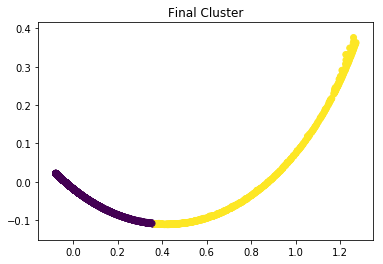

In [968]:
plt.scatter(BostMar_df.pca1,BostMar_df.pca2,c=clusters)
plt.title('Final Cluster')
plt.show()

In [969]:
BostMar_df.groupby(clusters).describe(include='object').T

0              1
name    count             15398            646
        unique            15380            646
        top     Lee, Michael R.  Bradley, Owen
        freq                  2              1
gender  count             15398            646
        unique                2              2
        top                   M              M
        freq               8966            633
bib     count             15398            646
        unique            15398            646
        top                8175            152
        freq                  1              1
country count             15398            646
        unique               66             32
        top                 USA            USA
        freq              12558            523
city    count             15398            646
        unique             4302            428
        top            New York       New York
        freq                299             17

From the counts one cluster consists of most of the data.

In [970]:
BostMar_df.groupby(clusters).describe(include='category').T

0         1
division  count      15398       646
          unique      3693       479
          top           37         1
          freq          11         8
overall   count      15398       646
          unique     15398       596
          top        17598         1
          freq           1         2
genderdiv count      15398       646
          unique      9728       590
          top         4903         1
          freq           2         3
age_grp   count      15398       646
          unique        13         9
          top     (44, 49]  (24, 29]
          freq        2772       195
WC        count      15398       646
          unique         2         2
          top            0         0
          freq       15397       594

In [971]:
BostMar_df.drop(['pca1','pca2'],1).groupby('clusters').mean().T


clusters,0,1
25k,119.423767,89.774768
age,42.029030,32.335913
10k,47.209801,35.632384
half,100.246894,75.607848
official,210.400794,155.430139
pace,8.032891,5.935851
30k,145.076225,108.532709
5k,23.661435,17.828189
20k,95.014047,71.708885
35k,171.787378,127.727012


In [981]:
BostMar_df.head()

,25k,age,name,division,10k,gender,half,official,bib,country,overall,pace,30k,5k,genderdiv,20k,35k,city,40k,sex,age_grp,WC,clusters,pca1,pca2
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,CAN,9,3.47,62.07,8.90,9,38.80,74.73,Toronto,85.55,1,"(24, 29]",1,1,1.245567,0.328526
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,KEN,5,5.07,92.97,15.90,5,61.52,108.78,Kenya,124.77,1,"(29, 34]",0,1,1.264088,0.351364
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,ETH,1,4.98,92.72,15.93,1,61.53,108.68,Ambo,123.78,1,"(19, 24]",0,1,1.271849,0.363040
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,AUS,5,3.38,61.35,8.98,5,39.88,73.00,Hamilton,83.43,1,"(29, 34]",1,1,1.256849,0.348327
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,JPN,3,3.33,59.92,8.92,3,38.55,71.68,Iizuka,81.88,1,"(34, 39]",1,1,1.259373,0.361895


In [986]:
BostMar_df.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'country', 'overall', 'pace', '30k', '5k', 'genderdiv', '20k',
       '35k', 'city', '40k', 'sex', 'age_grp', 'WC', 'clusters', 'pca1',
       'pca2'],
      dtype='object')

In [994]:
str(i)+'k'

'25k'

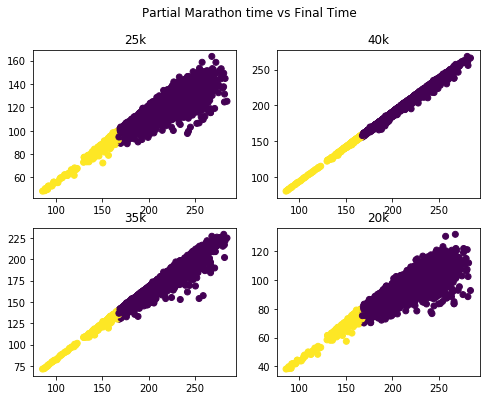

In [1000]:
plt.figure(figsize=(8,6))
plt.suptitle('Partial Marathon time vs Final Time')
plt.tight_layout()
 
for i ,j in enumerate([25,40,35,20]):
    plt.subplot(2,2,i+1)
    plt.title('{}'.format(str(j)+'k'))
    x = BostMar_df['official']
    y = BostMar_df[str(j)+'k']
    clust = BostMar_df['clusters']
    plt.scatter(x,y,c=clust)

The clusters seemed to have spit the faster times from the slower times.

In [ ]:
# separate dataframes for clusters for analysis
Cluster1 = BostMar_df[BostMar_df.clusters==0]
Cluster2 = BostMar_df[BostMar_df.clusters==1]
 

In [1005]:
print('Cluster1 slowest time' ,Cluster1.official.max())
print('Cluster1 fastest time' ,Cluster1.official.min())
print('Cluster2 slowest time' ,Cluster2.official.max())
print('Cluster2 fastest time' ,Cluster2.official.min())

Cluster1 slowest time 284.23
Cluster1 fastest time 167.55
Cluster2 slowest time 202.4
Cluster2 fastest time 85.53


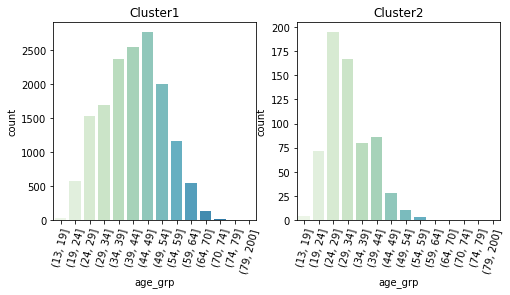

In [1006]:
plt.figure(figsize=(8,8))
plt.subplot(221)
sns.countplot(Cluster1.age_grp,palette='GnBu')
plt.title('Cluster1')
plt.xticks(rotation=75)
plt.subplot(222)
sns.countplot(Cluster2.age_grp,palette='GnBu')
plt.xticks(rotation=75)
plt.title('Cluster2')
plt.show()

In [ ]:
You can see the the 

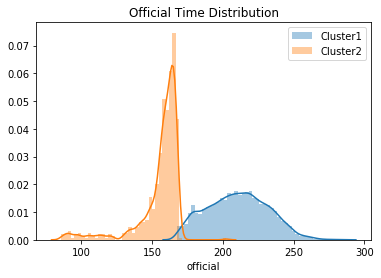

In [1038]:
sns.distplot(Cluster1.official, label="Cluster1")
sns.distplot(Cluster2.official, label="Cluster2")
plt.title("Official Time Distribution")
plt.legend()
plt.show()

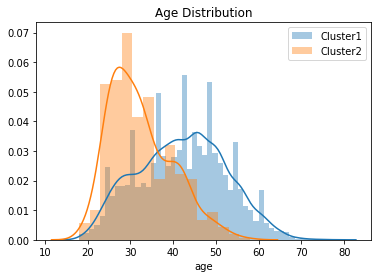

In [1036]:
sns.distplot(Cluster1.age,label="Cluster1")
sns.distplot(Cluster2.age,label="Cluster2")
plt.title('Age Distribution')
plt.legend()
plt.show()

You can see from the plots about that the time increse with age. Cluster one contains mostly runners under 35.

plt.figure(figsize=(10,10))
plt.subplot(221)
sns.countplot(Cluster1.gender,palette='GnBu')
plt.title('Cluster1')
plt.subplot(222)
sns.countplot(Cluster2.gender,palette='GnBu')
plt.title('Cluster2')
 

<function matplotlib.pyplot.show(*args, **kw)>

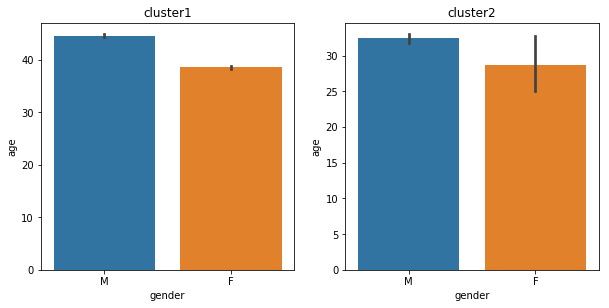

In [1019]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.barplot(Cluster1.gender,Cluster1.age)
plt.title('cluster1')
plt.subplot(222)
sns.barplot(Cluster2.gender,Cluster2.age)
plt.title('cluster2')
plt.show

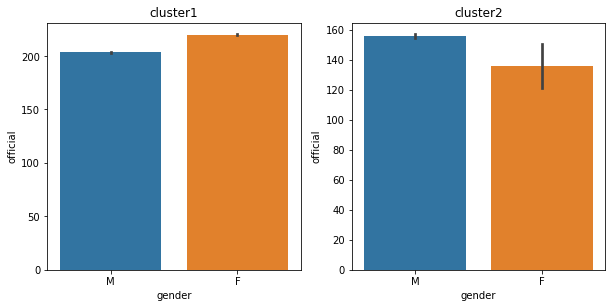

In [1022]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.barplot(Cluster1.gender,Cluster1.official)
plt.title('cluster1')
plt.subplot(222)
sns.barplot(Cluster2.gender,Cluster2.official)
plt.title('cluster2')
plt.show()

The within cluster average age and average official times are similar but in the cluster with the fast times the females altogether have a lower average time in Cluster 2. They do, however, represent only about 3 percent of Cluster 2.

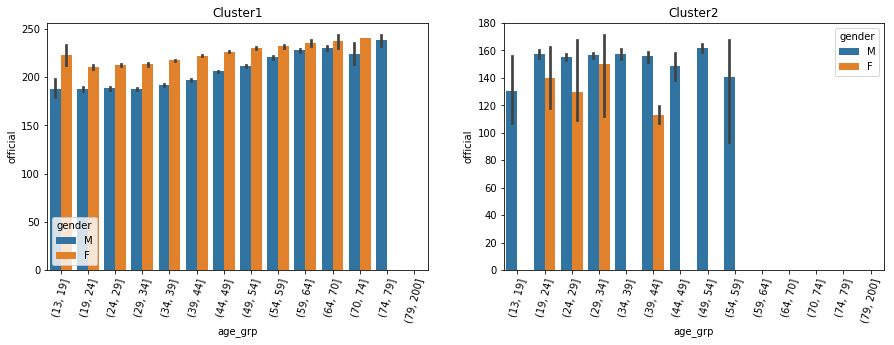

In [1029]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(Cluster1.age_grp,Cluster1.official,hue=Cluster1.gender)
plt.title('Cluster1')
plt.xticks(rotation=75)
plt.subplot(222)
sns.barplot(Cluster2.age_grp,Cluster2.official,hue=Cluster2.gender)
plt.title('Cluster2')
plt.xticks(rotation=75)
plt.show()

In cluster one you can also see that as marathon runners age the gap between female and male average times closes.

### Conclusion

The clustering algorithms were able to look at the data and resonalbly split on age and time. It was easy to analyize and see that sex and age play major role in prdicting marathon times.